# Traitement textes

### 1. Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
from nltk.tokenize import word_tokenize
import time
from sklearn import manifold
from sklearn import cluster
from sklearn import metrics
from sklearn import manifold, cluster, metrics
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim


2024-09-23 09:23:46.685201: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. EDA

In [2]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [4]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [5]:
data.shape

(1050, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [7]:
data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

- 642 catégories de produits
- une image par uniq_id, par product_url et par product_name, ce qui était attendu

In [8]:
data.isna().mean().sort_values()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
retail_price               0.000952
discounted_price           0.000952
product_specifications     0.000952
brand                      0.321905
dtype: float64

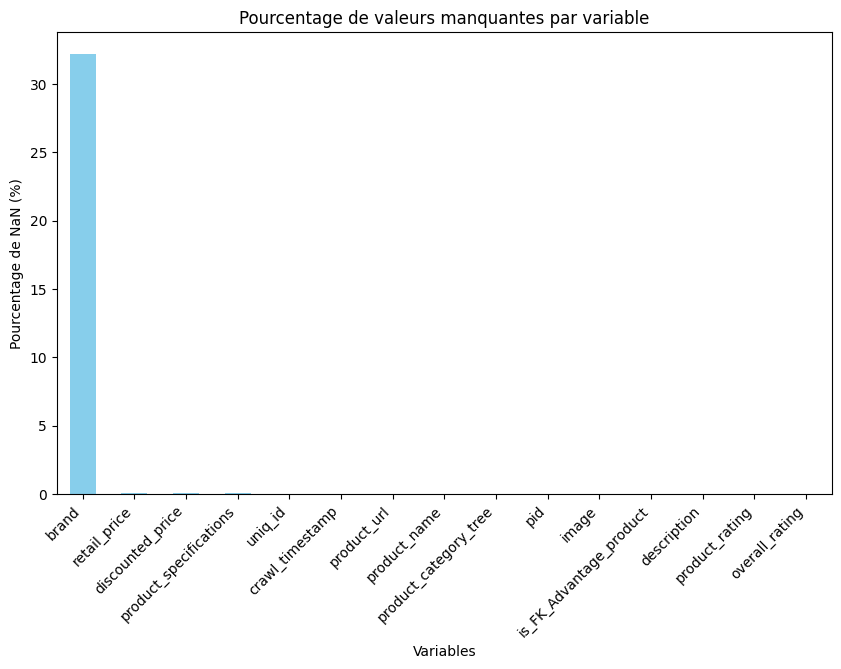

In [9]:
nan_percent = data.isna().mean() * 100

nan_percent_sorted = nan_percent.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
nan_percent_sorted.plot(kind='bar', color='skyblue')

plt.title('Pourcentage de valeurs manquantes par variable')
plt.ylabel('Pourcentage de NaN (%)')
plt.xlabel('Variables')

plt.xticks(rotation=45, ha='right')

plt.show()


In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [12]:
data[data['retail_price'] == data['retail_price'].max()]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
11,08452abdadb3db1e686b94a9c52fc7b6,2015-12-04 07:25:36 +0000,http://www.flipkart.com/cartier-w6701005-analo...,"Cartier W6701005 Analog Watch - For Boys, Men","[""Watches >> Wrist Watches >> Cartier Wrist Wa...",WATEAK8SE2RUK7GM,201000.0,201000.0,08452abdadb3db1e686b94a9c52fc7b6.jpg,False,"Cartier W6701005 Analog Watch - For Boys, Men...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."


In [13]:
data.describe(include=object)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,1050,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,1,1,889,889,11,22


Séparation de la colonne product_category_tree pour ne retenir que le premier niveau de classification

In [3]:
data['Category_Level_1'] = data['product_category_tree'].str.split('>>', expand=True)[0]

data['Category_Level_1'] = data['Category_Level_1'].str.replace('["', '', regex=False)

In [4]:
columns_of_interest= ['Category_Level_1', 'description']
df = data[columns_of_interest]

In [5]:
df

,Category_Level_1,description
0,Home Furnishing,Key Features of Elegance Polyester Multicolor ...
1,Baby Care,Specifications of Sathiyas Cotton Bath Towel (...
2,Baby Care,Key Features of Eurospa Cotton Terry Face Towe...
3,Home Furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Home Furnishing,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...
1045,Baby Care,Oren Empower Extra Large Self Adhesive Sticker...
1046,Baby Care,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,Baby Care,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,Baby Care,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


In [17]:
df.isna().mean()

Category_Level_1    0.0
description         0.0
dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Category_Level_1  1050 non-null   object
 1   description       1050 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB


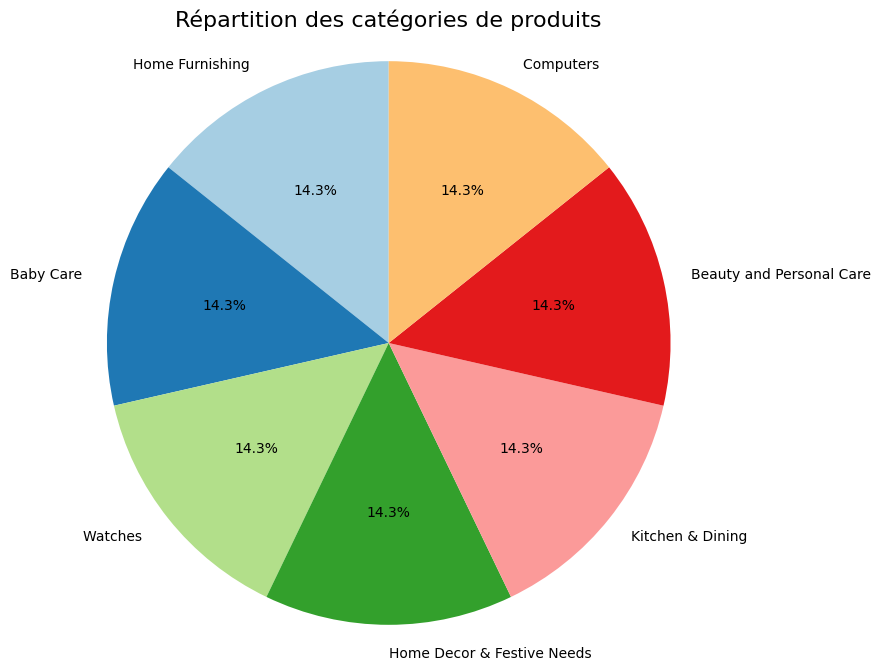

In [19]:
category_counts = df['Category_Level_1'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Répartition des catégories de produits', fontsize=16)
plt.axis('equal')

plt.show()

### 3. Pré-traitement et fonctions communes

- Application de la conversion en minuscules, du nettoyage des caractères spéciaux, des chiffres et des espaces
- Suppression des "stopwords" 
- Application de la lemmatisation (plus précis que le stemming)
- Stockage des résultats du prétraitement dans deux nouvelles colonnes pour chacune des colonnes description et product_name

Fonctions de pré-traitement des textes

In [6]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Bag of words, Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)  
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte avec lemmatisation
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text


In [7]:
l_cat = list(set(df['Category_Level_1']))
print("catégories : ", l_cat)

y_cat_num = [l_cat.index(df.iloc[i]['Category_Level_1']) for i in range(len(df))]

catégories :  ['Beauty and Personal Care ', 'Baby Care ', 'Computers ', 'Home Decor & Festive Needs ', 'Kitchen & Dining ', 'Home Furnishing ', 'Watches ']


Fonctions pour la détermination de l'ARI 

In [8]:
resultats = pd.DataFrame(columns=['Méthode', 'ARI', 'Temps d\'exécution'])

def ARI_fct(features, methode):
    time1 = time.time()  
    
    num_labels = len(l_cat)  
    
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    
    time2 = np.round(time.time() - time1, 0)
    
    print("ARI : ", ARI, "Temps : ", time2)
    
    global resultats  
    resultats = resultats.append({'Méthode': methode, 'ARI': ARI, 'Temps d\'exécution': time2}, ignore_index=True)
    
    return ARI, X_tsne, cls.labels_

Fonctions pour la visualisation 2D (t-SNE et ACP)

In [9]:
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, title1="Représentation des catégories réelles", title2="Représentation de la prédiction des clusters"):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    scatter1 = axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_cat_num, cmap='Set1')
    handles1, labels1 = scatter1.legend_elements()
    axes[0].legend(handles1, l_cat, loc='center left', bbox_to_anchor=(1, 0.5), title="Catégories")
    axes[0].set_title(title1)

    scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='Set1')
    handles2, labels2 = scatter2.legend_elements()
    axes[1].legend(handles2, set(labels), loc='center left', bbox_to_anchor=(1, 0.5), title="Clusters")
    axes[1].set_title(title2)
    
    plt.tight_layout()
    plt.show()
    print("ARI : ", ARI)


def apply_pca_and_visualize(data, n_components=2, title='PCA of Embeddings'):

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)
    explained_variance = pca.explained_variance_ratio_
    
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
    plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')
    plt.grid(True)
    plt.show()

Application des fonctions de pré-traitement de texte

In [10]:
df['description_bow'] = df['description'].apply(lambda x : transform_bow_fct(x))
df['description_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))
df['description_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))

/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_17647/2191366429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_bow'] = df['description'].apply(lambda x : transform_bow_fct(x))
/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_17647/2191366429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))
/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_17647/2191366429.py:3: Sett

Exemples de prétraitement du texte

In [53]:
exemple_texte = df['description'].iloc[300]
exemple_texte 

'Buy Elephant 9.84 inch Lid for Rs.450 online. Elephant 9.84 inch Lid at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'

In [54]:
# Prétraitement pour BoW, TF-idf et Word2Vec
word_tokens = tokenizer_fct(exemple_texte)
print(word_tokens)
sw = stop_word_filter_fct(word_tokens)
print(sw)
lw = lower_start_fct(sw)
print(lw)
lem_w = lemma_fct(lw)
print(lem_w)
transf_desc_text_lem = ' '.join(lem_w)
print(transf_desc_text_lem)



['Buy', 'Elephant', '9.84', 'inch', 'Lid', 'for', 'Rs.450', 'online', '.', 'Elephant', '9.84', 'inch', 'Lid', 'at', 'best', 'prices', 'with', 'FREE', 'shipping', '&', 'cash', 'on', 'delivery', '.', 'Only', 'Genuine', 'Products', '.', '30', 'Day', 'Replacement', 'Guarantee', '.']
['Buy', 'Elephant', '9.84', 'inch', 'Lid', 'Rs.450', 'online', 'Elephant', '9.84', 'inch', 'Lid', 'best', 'prices', 'FREE', 'shipping', 'cash', 'delivery', 'Only', 'Genuine', 'Products', 'Day', 'Replacement', 'Guarantee']
['buy', 'elephant', '9.84', 'inch', 'lid', 'rs.450', 'online', 'elephant', '9.84', 'inch', 'lid', 'best', 'prices', 'free', 'shipping', 'cash', 'delivery', 'only', 'genuine', 'products', 'day', 'replacement', 'guarantee']
['buy', 'elephant', '9.84', 'inch', 'lid', 'rs.450', 'online', 'elephant', '9.84', 'inch', 'lid', 'best', 'price', 'free', 'shipping', 'cash', 'delivery', 'only', 'genuine', 'product', 'day', 'replacement', 'guarantee']
buy elephant 9.84 inch lid rs.450 online elephant 9.84 i

In [55]:
# Prétraitement pour BERT et USE
word_tokens_dl = tokenizer_fct(exemple_texte)
print(word_tokens_dl)
lw_dl = lower_start_fct(word_tokens_dl)
print(lw_dl)
transf_desc_text_dl = ' '.join(lw_dl)
print(transf_desc_text_dl)

['Buy', 'Elephant', '9.84', 'inch', 'Lid', 'for', 'Rs.450', 'online', '.', 'Elephant', '9.84', 'inch', 'Lid', 'at', 'best', 'prices', 'with', 'FREE', 'shipping', '&', 'cash', 'on', 'delivery', '.', 'Only', 'Genuine', 'Products', '.', '30', 'Day', 'Replacement', 'Guarantee', '.']
['buy', 'elephant', '9.84', 'inch', 'lid', 'for', 'rs.450', 'online', '.', 'elephant', '9.84', 'inch', 'lid', 'at', 'best', 'prices', 'with', 'free', 'shipping', '&', 'cash', 'on', 'delivery', '.', 'only', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee', '.']
buy elephant 9.84 inch lid for rs.450 online . elephant 9.84 inch lid at best prices with free shipping & cash on delivery . only genuine products . 30 day replacement guarantee .


### 4. Bag of words & Tf-idf

In [13]:
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description_bow_lem'
cv_fit = cvect.fit(df[feat])
cv_transform = cvect.transform(df[feat]) 

ctf_fit = ctf.fit(df[feat])
ctf_transform = ctf.transform(df[feat])  

In [14]:
print("Bag of Words: ")
ARI, X_tsne, labels = ARI_fct(cv_transform, 'Bag of words')


Bag of Words: 


/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.3843 Temps :  14.0


/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_17647/66493535.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultats = resultats.append({'Méthode': methode, 'ARI': ARI, 'Temps d\'exécution': time2}, ignore_index=True)


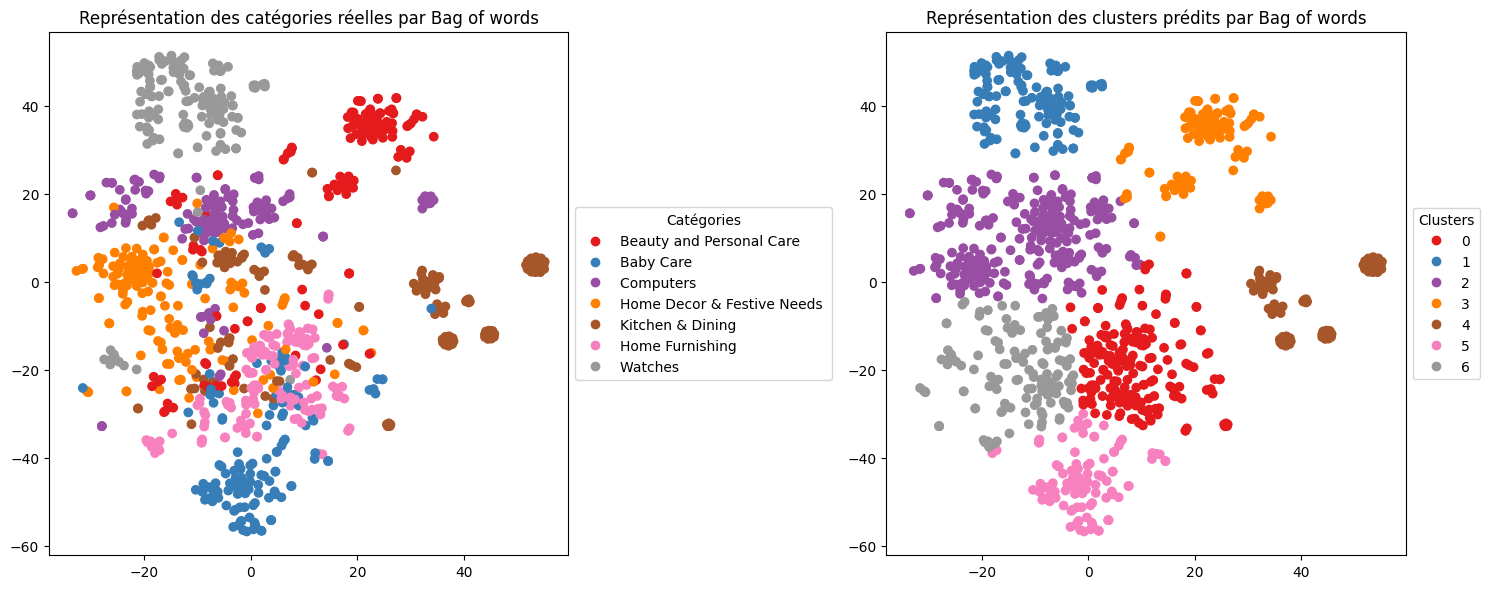

ARI :  0.3843


In [15]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, title1="Représentation des catégories réelles par Bag of words", 
               title2="Représentation des clusters prédits par Bag of words")

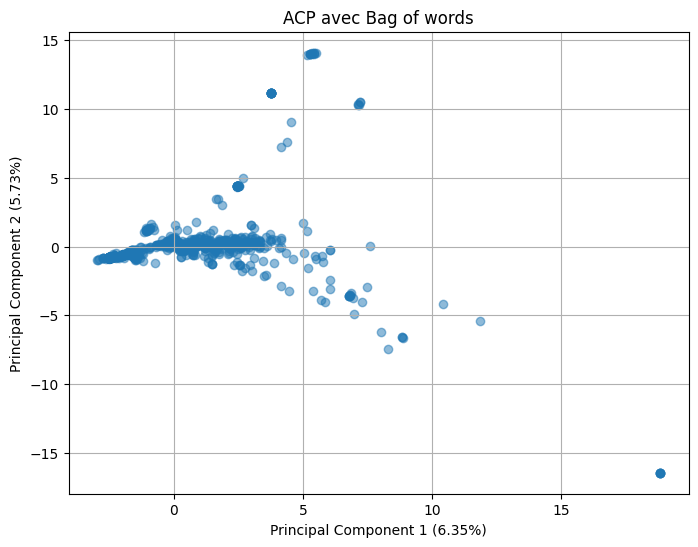

In [16]:
apply_pca_and_visualize(cv_transform.toarray(), n_components=2, title='ACP avec Bag of words')

In [17]:
print("Tf-idf: ")

ARI, X_tsne, labels = ARI_fct(ctf_transform, 'Tf-idf')

Tf-idf: 


/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.4989 Temps :  12.0


/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_17647/66493535.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultats = resultats.append({'Méthode': methode, 'ARI': ARI, 'Temps d\'exécution': time2}, ignore_index=True)


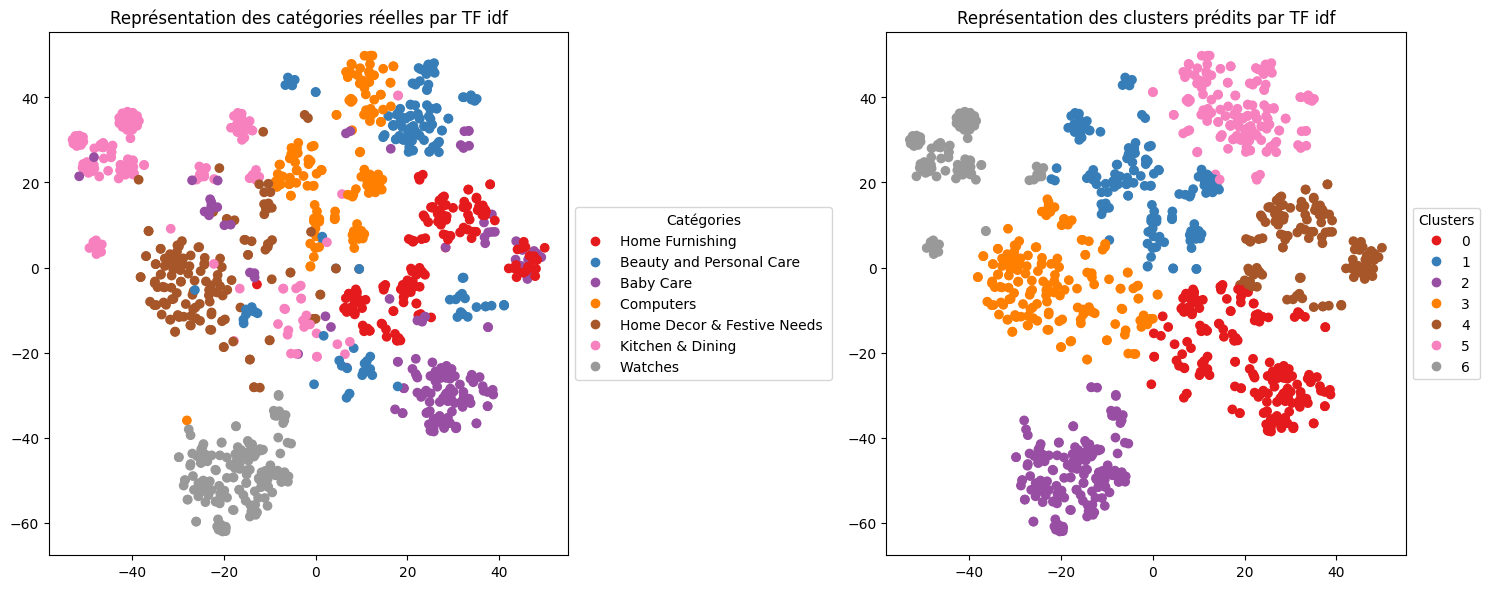

ARI :  0.5007


In [29]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, title1="Représentation des catégories réelles par Tf-idf", 
               title2="Représentation des clusters prédits par Tf-idf")

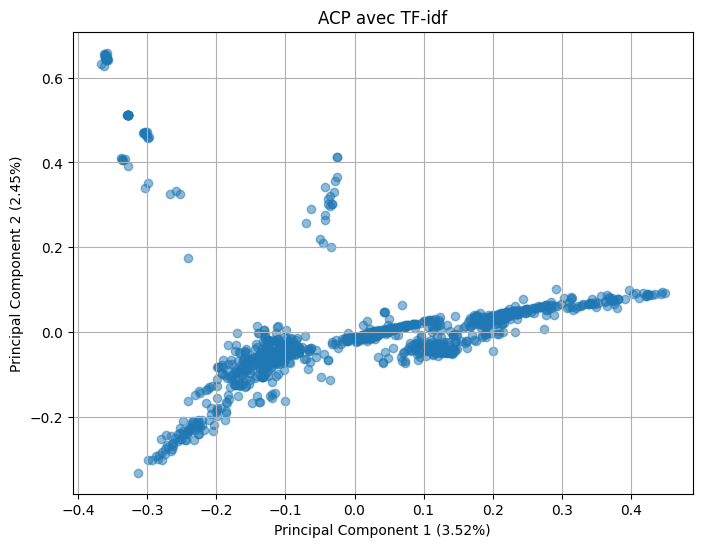

In [30]:
apply_pca_and_visualize(ctf_transform.toarray(), n_components=2, title='ACP avec TF-idf')

### 5. Word2Vec

In [18]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 500 
sentences = df['description_bow'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [19]:
print("Build & train Word2Vec model")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model
Vocabulary size: 5098
Word2Vec trained


In [20]:
print("Fit Tokenizer")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer
Number of unique words: 5099


In [21]:
print("Create Embedding matrix")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix
Word embedding rate :  1.0
Embedding matrix: (5099, 300)


In [22]:
input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 500, 300)       │     1,529,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 300)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,529,700 (5.84 MB)

 Trainable params: 1,529,700 (5.84 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


(1050, 300)

In [24]:
ARI, X_tsne, labels = ARI_fct(embeddings, 'Word2Vec')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.33 Temps :  11.0


/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_17647/66493535.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultats = resultats.append({'Méthode': methode, 'ARI': ARI, 'Temps d\'exécution': time2}, ignore_index=True)


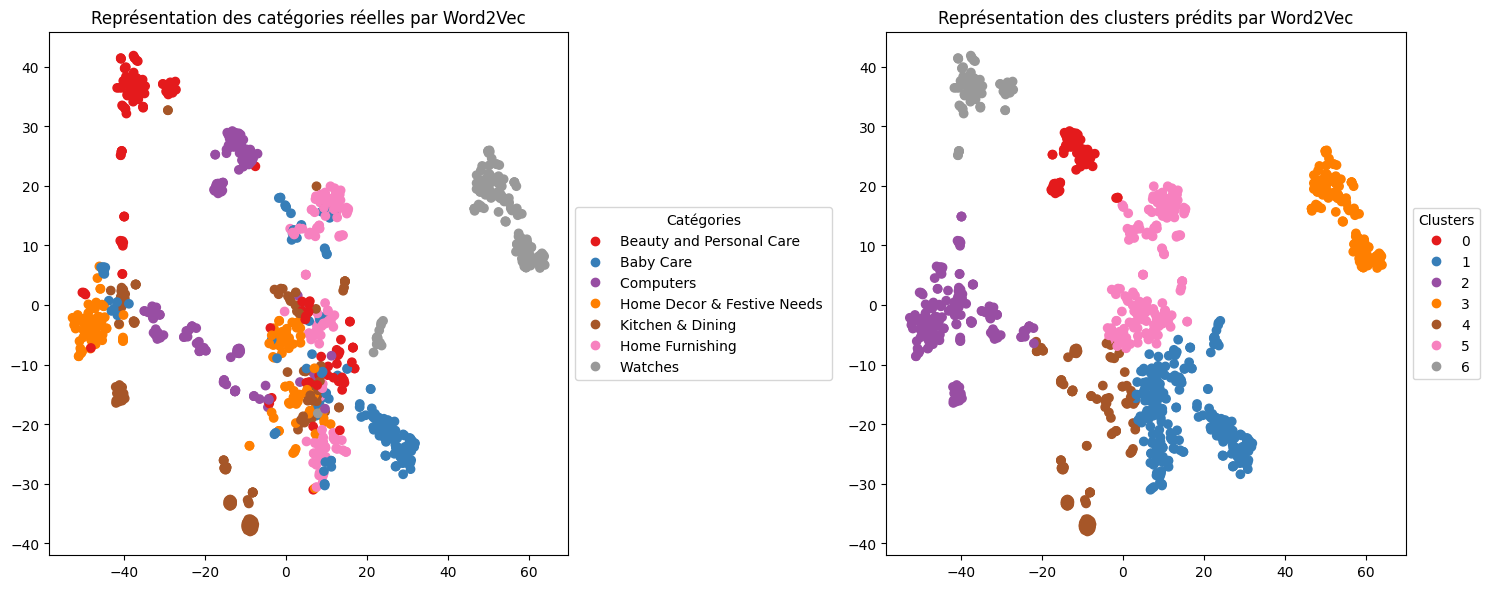

ARI :  0.33


In [25]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, title1="Représentation des catégories réelles par Word2Vec", 
               title2="Représentation des clusters prédits par Word2Vec")

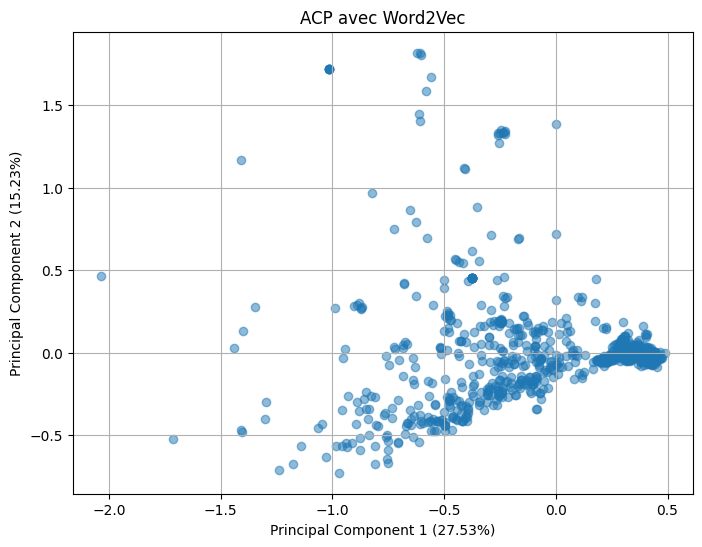

In [26]:
apply_pca_and_visualize(embeddings, n_components=2, title='ACP avec Word2Vec')

### 6. BERT

In [40]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

/opt/anaconda3/lib/python3.11/site-packages/transformers/deepspeed.py:24: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


In [41]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : 
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

#### 6.1. BERT base uncased

In [42]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['description_dl'].to_list()

loading configuration file config.json from cache at /Users/amira/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at /Users/amira/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f72

In [43]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at /Users/amira/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at /Users/amira/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/vocab.txt
l

1/1 [==============================] - 2s 2s/step
temps traitement :  329.0


In [44]:
ARI, X_tsne, labels = ARI_fct(features_bert,'bert-base-uncased')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.323 Temps :  13.0


/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_77880/439966095.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultats = resultats.append({'Méthode': methode, 'ARI': ARI, 'Temps d\'exécution': time2}, ignore_index=True)


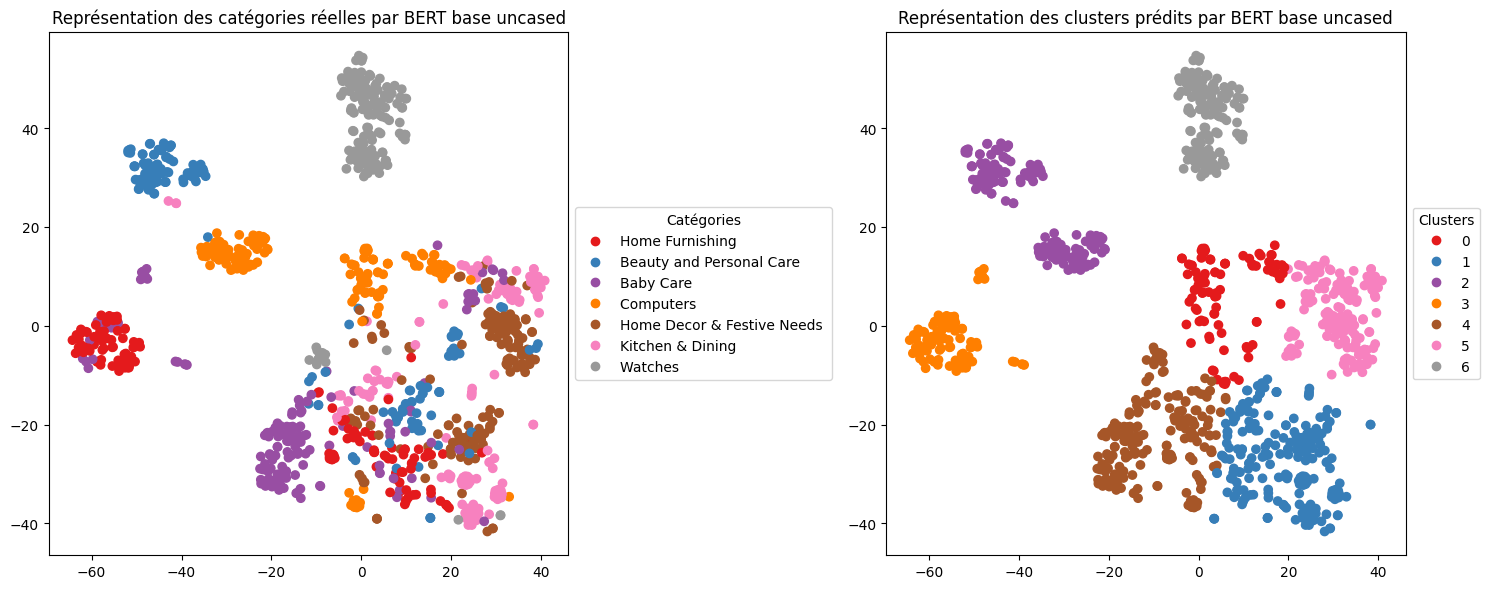

ARI :  0.323


In [45]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, title1="Représentation des catégories réelles par BERT base uncased", 
               title2="Représentation des clusters prédits par BERT base uncased")

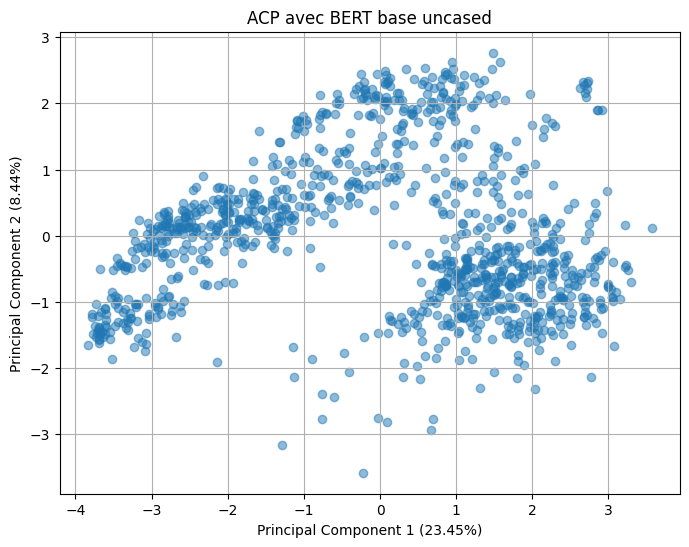

In [46]:
apply_pca_and_visualize(features_bert, n_components=2, title='ACP avec BERT base uncased')

#### 6.2. BERT hub Tensorflow

In [48]:
import kagglehub
import tensorflow_hub as hub
path = kagglehub.model_download("tensorflow/bert/tensorFlow2/en-uncased-l-12-h-768-a-12")
bert_layer = hub.KerasLayer(path, trainable=True)

In [49]:
sentences = df['description_dl'].to_list()

In [50]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

loading configuration file config.json from cache at /Users/amira/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at /Users/amira/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/vocab.txt
l

temps traitement :  202.0


In [51]:
ARI, X_tsne, labels = ARI_fct(features_bert, 'BERT hub Tensorflow')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.3154 Temps :  14.0


/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_77880/439966095.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultats = resultats.append({'Méthode': methode, 'ARI': ARI, 'Temps d\'exécution': time2}, ignore_index=True)


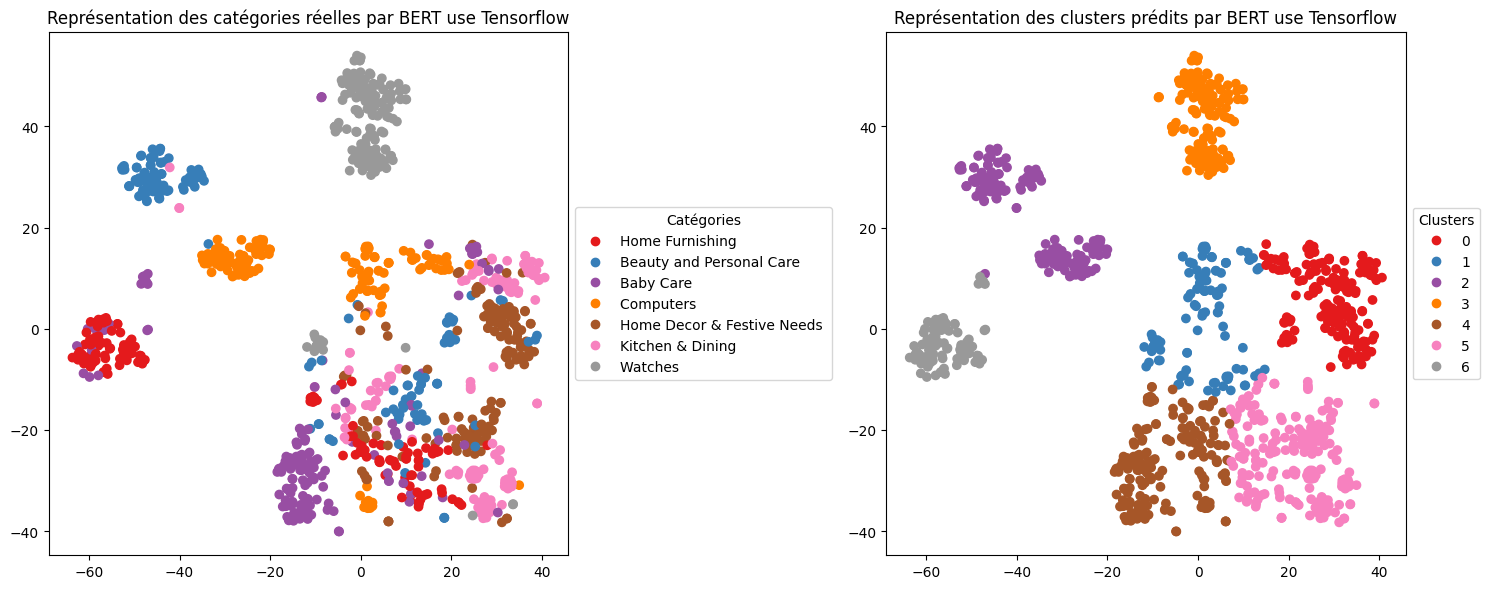

ARI :  0.3154


In [52]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, title1="Représentation des catégories réelles par BERT use Tensorflow", 
               title2="Représentation des clusters prédits par BERT use Tensorflow")

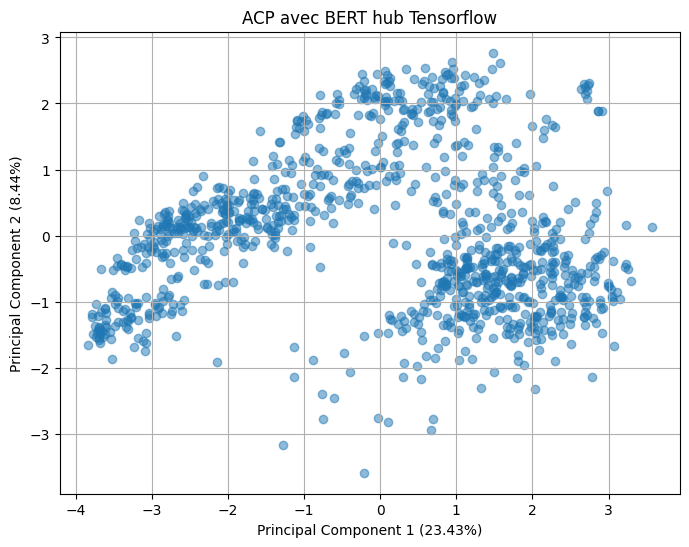

In [53]:
apply_pca_and_visualize(features_bert, n_components=2, title='ACP avec BERT hub Tensorflow')

### 7. Universal Sentence Encoder

In [54]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [55]:
import tensorflow_hub as hub

embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")


In [56]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [57]:
batch_size = 10
sentences = df['description_dl'].to_list()

In [58]:
features_USE = feature_USE_fct(sentences, batch_size)

In [59]:
ARI, X_tsne, labels = ARI_fct(features_USE,'USE')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.4368 Temps :  15.0


/var/folders/xy/0lf4cqg97cq6qg1y7t6fp0sw0000gn/T/ipykernel_77880/439966095.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultats = resultats.append({'Méthode': methode, 'ARI': ARI, 'Temps d\'exécution': time2}, ignore_index=True)


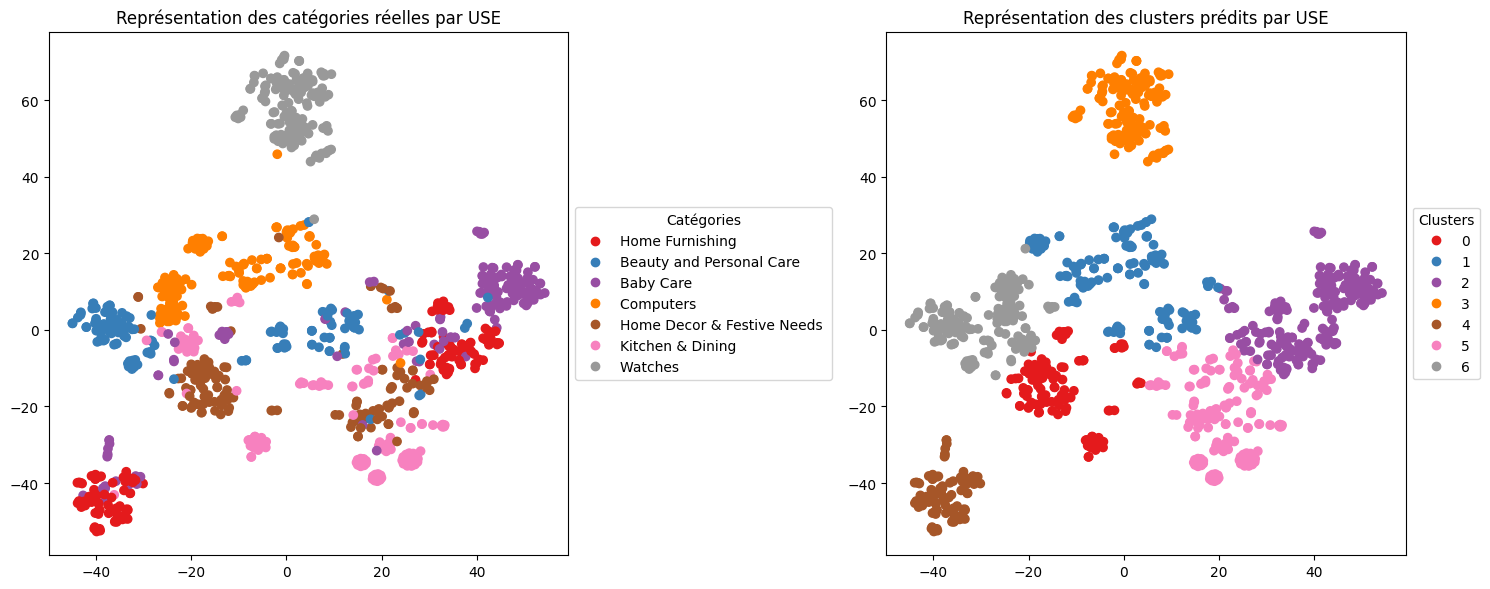

ARI :  0.4368


In [60]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI, title1="Représentation des catégories réelles par USE", 
               title2="Représentation des clusters prédits par USE")

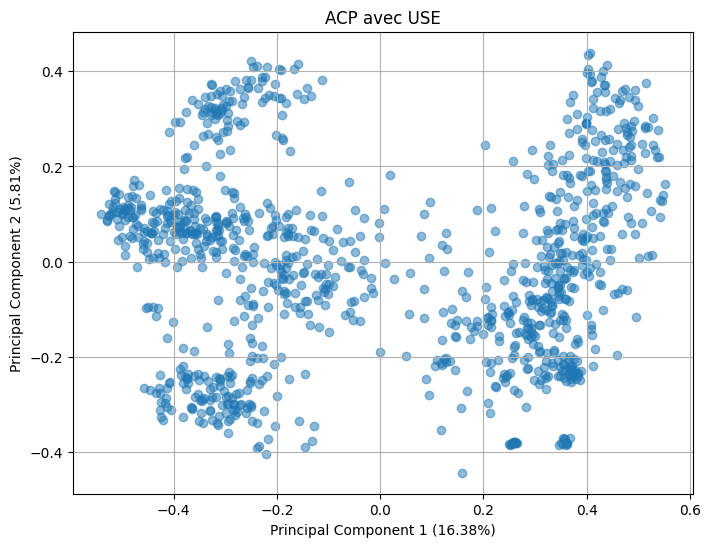

In [61]:
apply_pca_and_visualize(features_USE, n_components=2, title='ACP avec USE')

### 8. Conclusion

In [62]:
resultats

,Méthode,ARI,Temps d'exécution
0,Bag of words,0.3843,17.0
1,Tf-IDF,0.5007,16.0
2,Word2Vec,0.3202,15.0
3,bert-base-uncased,0.3230,13.0
4,BERT hub Tensorflow,0.3154,14.0
5,USE,0.4368,15.0


- La méthode Tf-idf offre le meilleur compromis entre qualité et temps d'exécution, avec l'ARI le plus élevé (0.5007) et un temps raisonnable (16.0s). Pour notre objectif de classification des produits, c'est la méthode la plus efficace.
- Les méthodes Bag of Words et USE sont des alternatives raisonnables si la simplicité ou des embeddings de phrases sont préférés.
- Word2Vec et les modèles BERT sous-performent ici, même si BERT a un bon temps d'exécution.